In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

## Consider only the below columns and prepare a prediction model for predicting Price.

## Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [4]:
corrola = pd.read_csv('C:/Users/HP/Downloads/ToyotaCorolla.csv',engine='python',index_col=0)
corrola.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


In [5]:
corrola.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [6]:
#Check for missing values
corrola.isna().sum()

Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [7]:
#Check for duplicates row
corrola[corrola.duplicated()].shape

(0, 37)

In [8]:
#Select Columns  Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
corrola1 = corrola[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [9]:
corrola1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170


In [10]:
#Rename columns
corrola2 = corrola1.rename({'Age_08_04': 'Age','cc':'CC'},axis = 1)
corrola2.head()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170


In [11]:
# Find Correlation
corrola2.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Scatterplot between variables along with histogram.

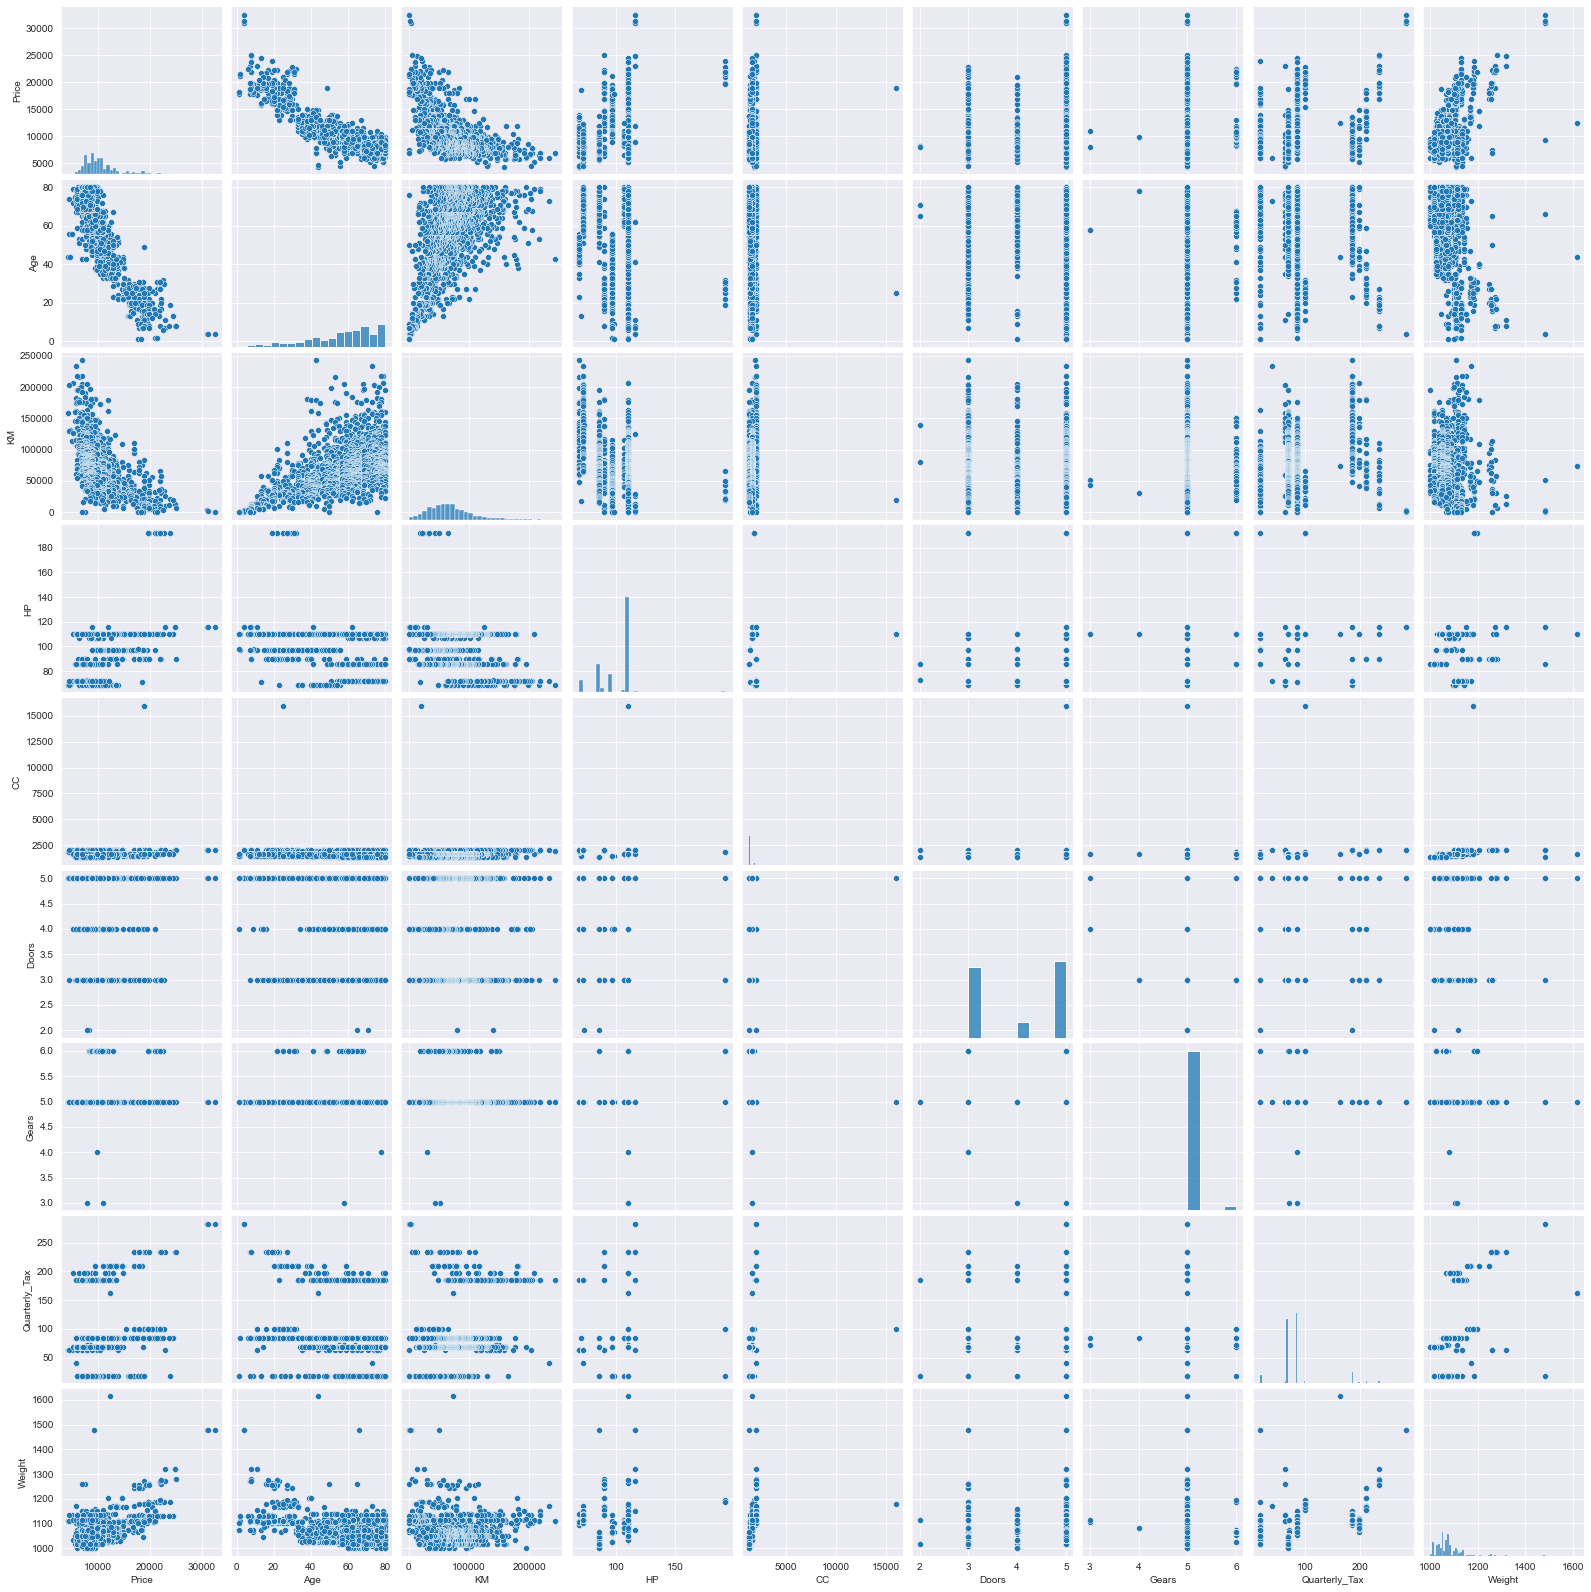

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(corrola2)

# Preparing Model

In [13]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight', data = corrola2).fit()

In [14]:
#Cofficient
model.params

Intercept       -5573.106358
Age              -121.658402
KM                 -0.020817
HP                 31.680906
CC                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [15]:
#Print t-values and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age             -46.511852
KM              -16.621622
HP               11.241018
CC               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age              3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
CC                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [16]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

# Model validation Technics

In [17]:
# Corlinerity check
rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data = corrola2).fit().rsquared  
vif_Age = 1/(1-rsq_age) 

rsq_KM = smf.ols('KM~Age+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data = corrola2).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~Age+KM+CC+Doors+Gears+Quarterly_Tax+Weight',data = corrola2).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_CC = smf.ols('CC~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data = corrola2).fit().rsquared  
vif_CC = 1/(1-rsq_CC)  

rsq_Doors = smf.ols('Doors~Age+KM+HP+CC+Gears+Quarterly_Tax+Weight',data = corrola2).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) 

rsq_Gears = smf.ols('Gears~Age+KM+HP+CC+Doors+Quarterly_Tax+Weight',data = corrola2).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 

rsq_QT = smf.ols('Quarterly_Tax~Age+KM+HP+CC+Doors+Gears+Weight',data = corrola2).fit().rsquared  
vif_QT = 1/(1-rsq_QT)  

rsq_Weight = smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax',data = corrola2).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)  

In [18]:
# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [19]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

## 2. Residual Analysis

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


NameError: name 'plt' is not defined

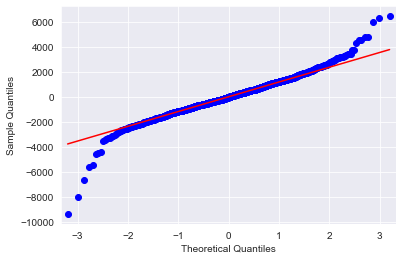

In [20]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([147, 523], dtype=int64)]

In [22]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [23]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

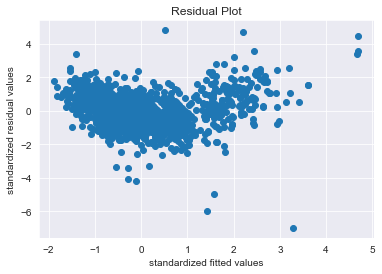

In [25]:
import matplotlib.pyplot as plt
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [26]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

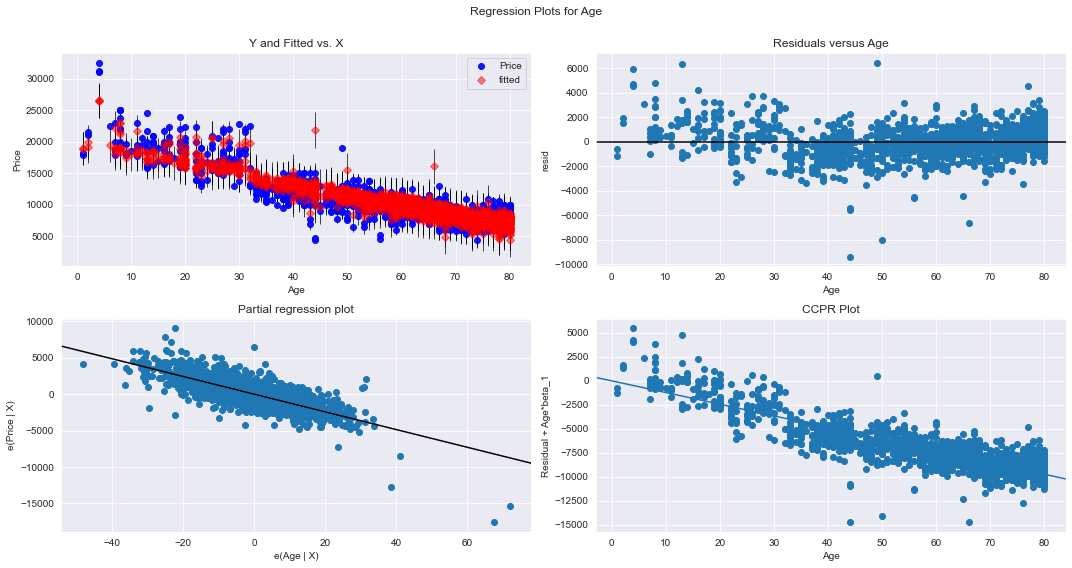

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

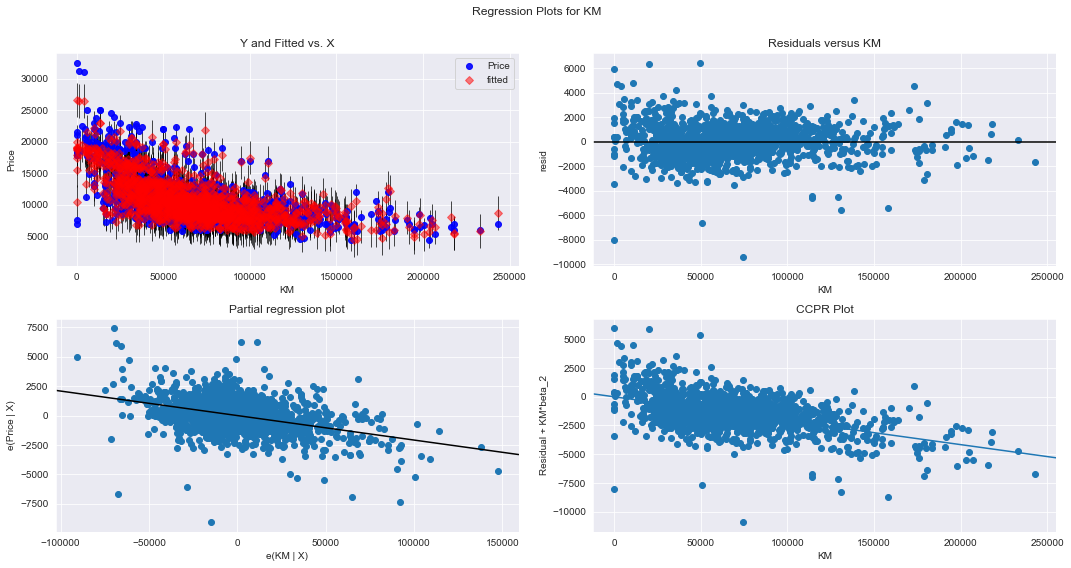

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

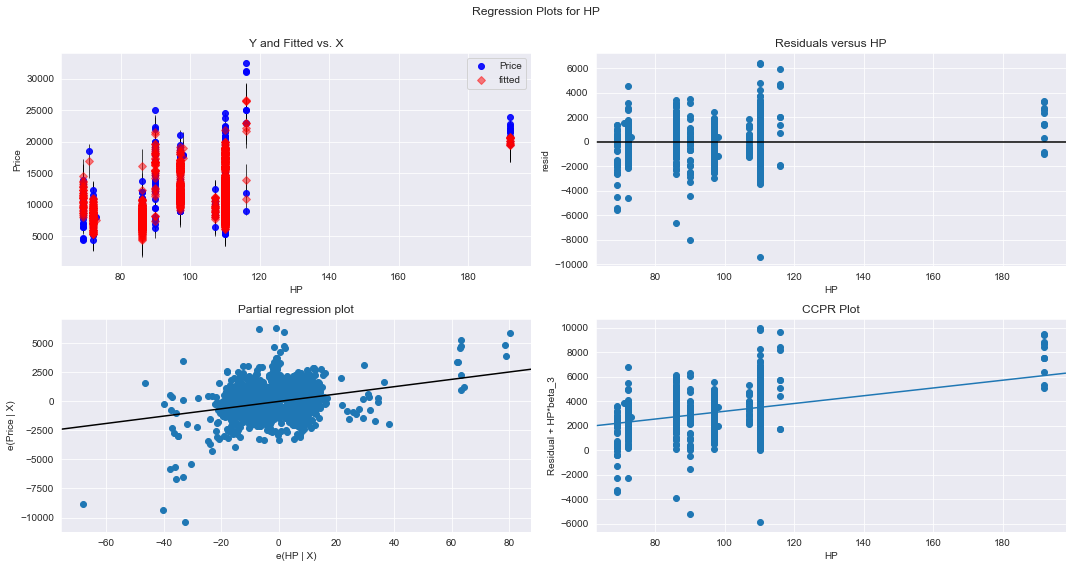

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

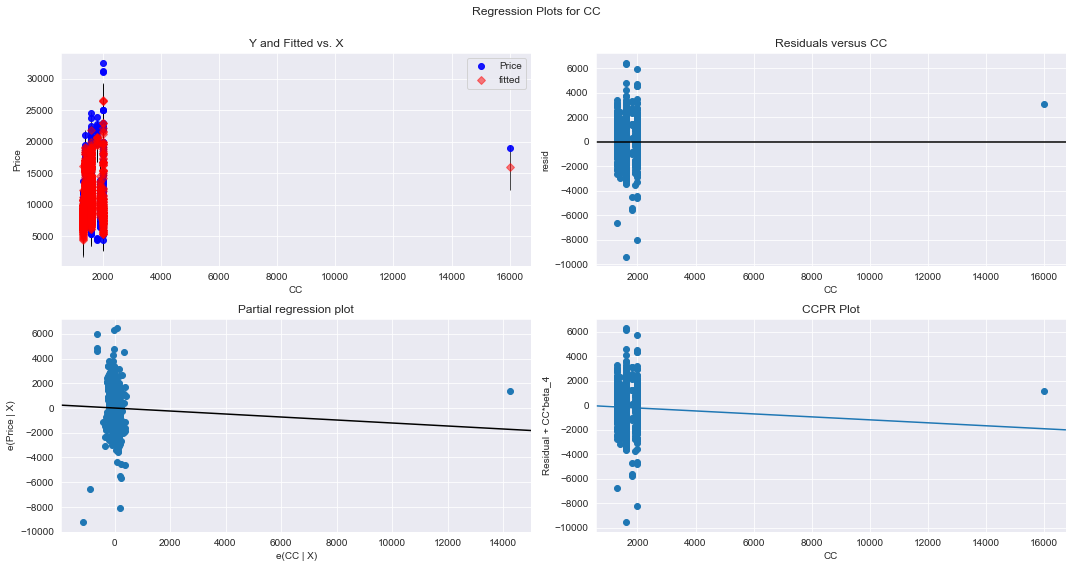

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

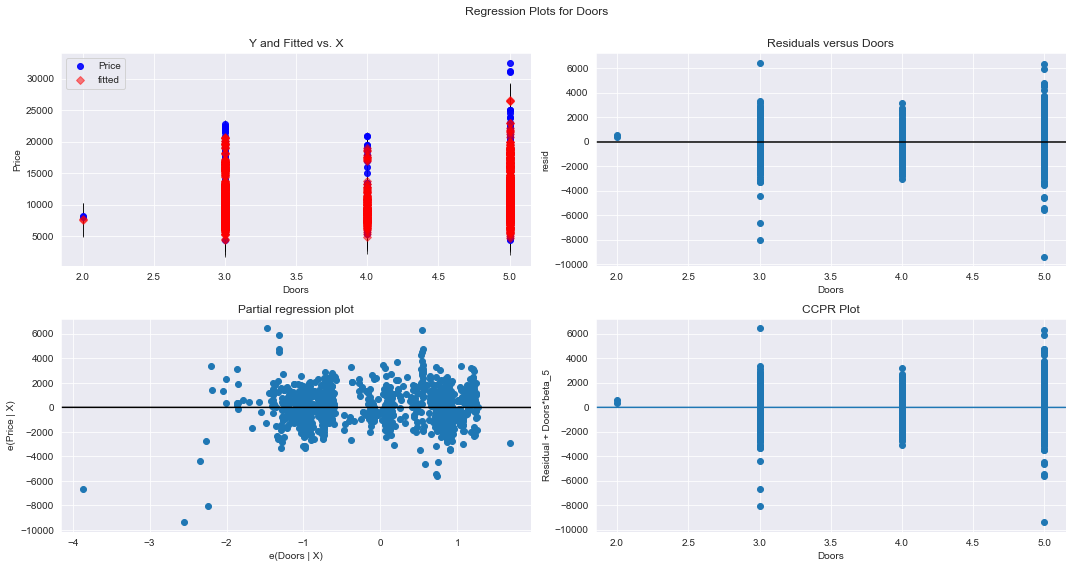

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

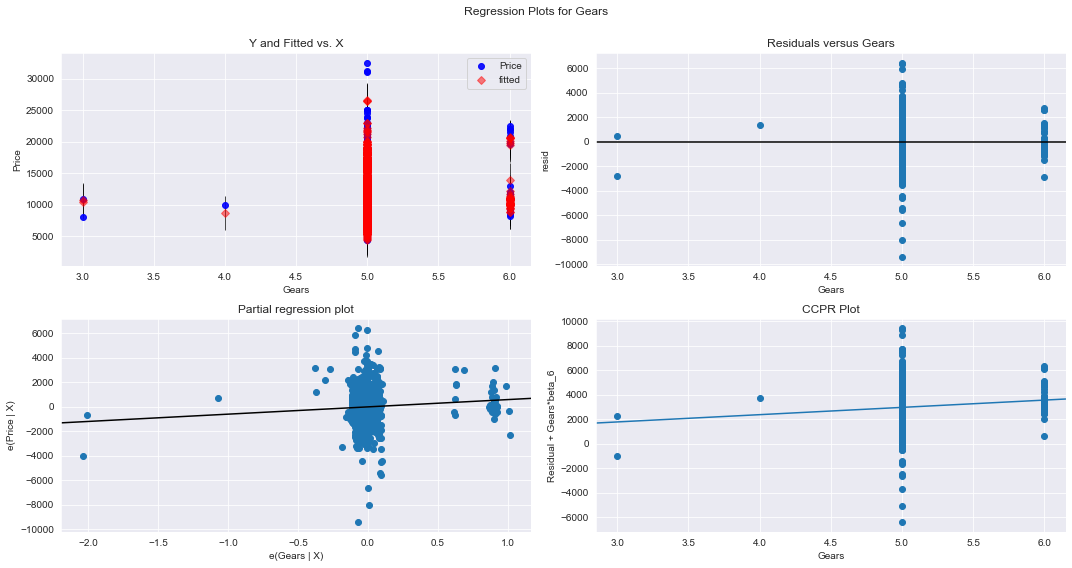

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

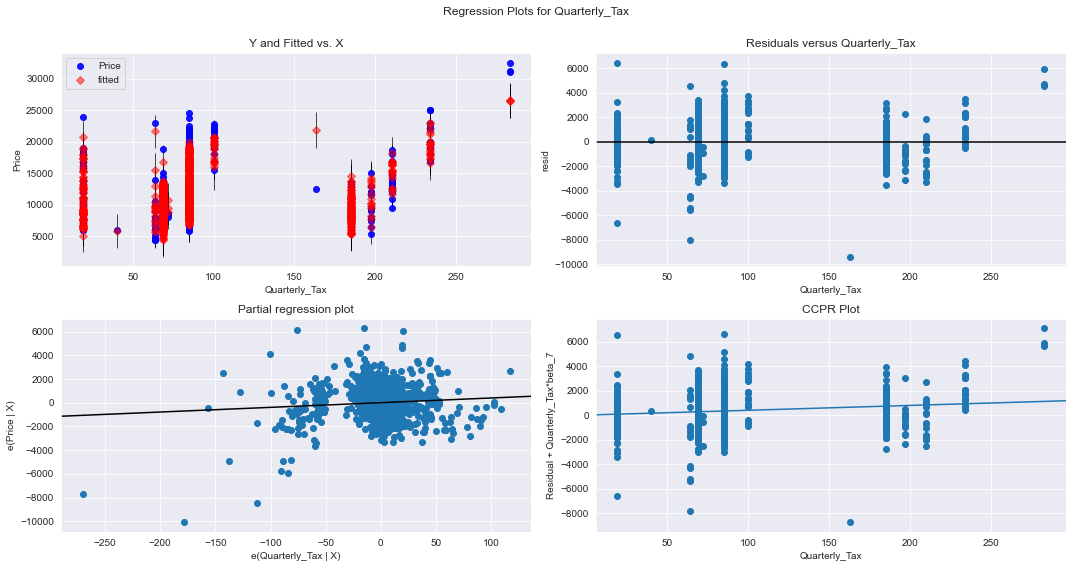

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

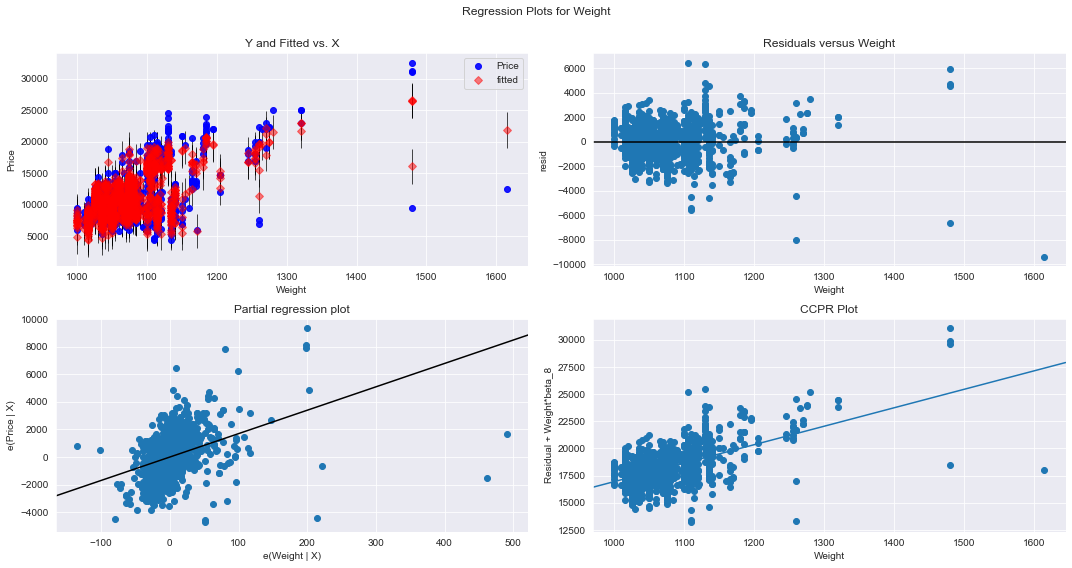

In [35]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)
# 1. Cook's Distance

In [38]:
# If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

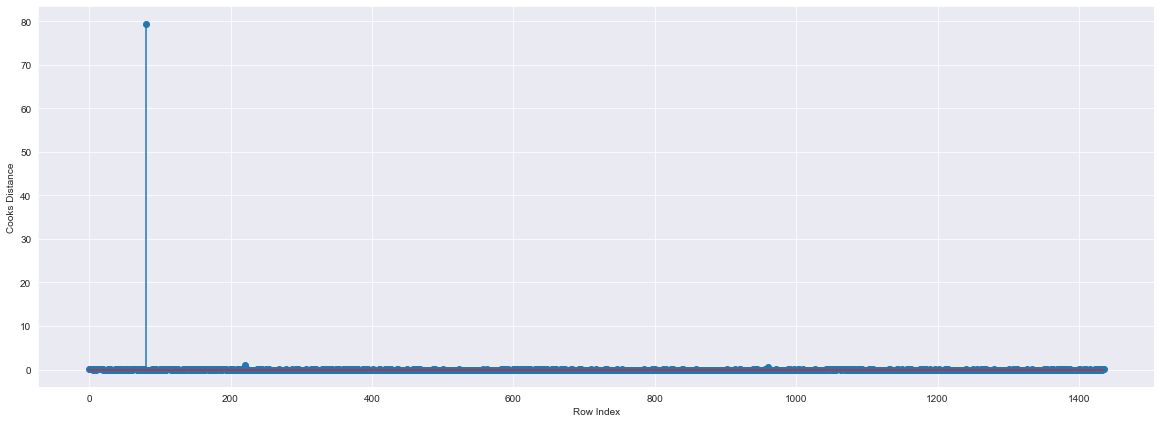

In [40]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(corrola2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 79.52010624138055)

# 2. Leverage Value

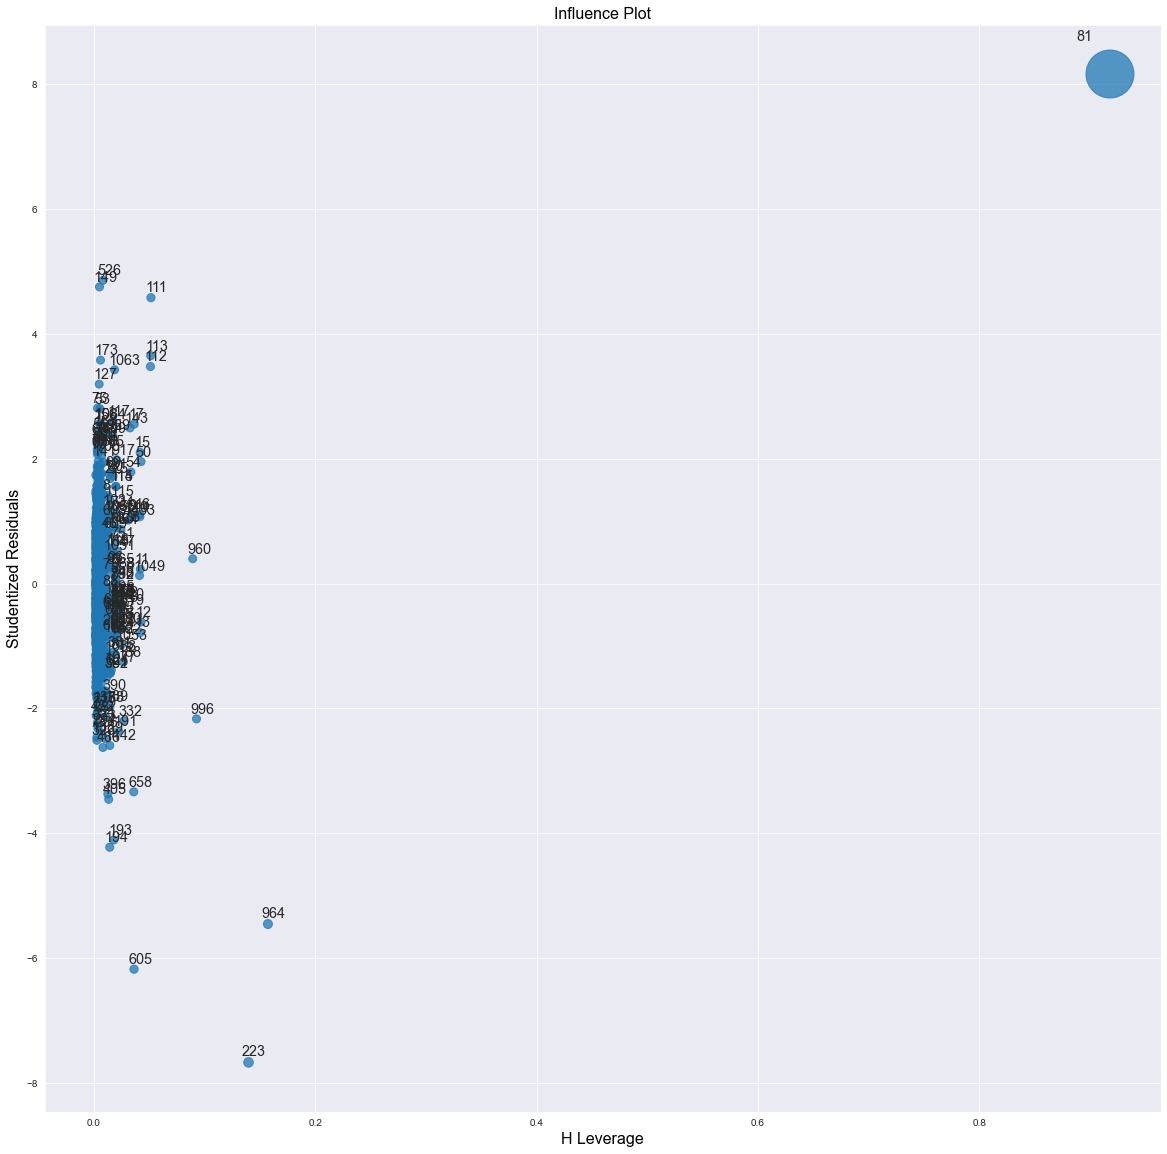

In [43]:
# using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [46]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=corrola2.shape[1]
n=corrola2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020891364902506964

In [48]:
corrola2[corrola2.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
80,14900,30,22000,97,1400,5,5,85,1110


In [49]:
# Creating a copy of data so that original dataset is not affected
df_new=corrola2.copy()
df_new

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1438,7500,69,20544,86,1300,3,5,69,1025
1439,10845,72,19000,86,1300,3,5,69,1015
1440,8500,71,17016,86,1300,3,5,69,1015


In [50]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df=df_new.drop(df_new.index[[80]],axis=0).reset_index(drop=True)
df

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Model Deletion Diagnostics and Final Model

In [52]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df=df.drop(df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8894191849749751


In [53]:
final_model.rsquared

0.8894191849749751

In [54]:
df

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


# Model Predictions

In [58]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"Quarterly_Tax":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,12,40000,80,1300,4,5,69,1012


In [59]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14337.947064
dtype: float64

In [60]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(df)
pred_y

0       16351.012991
1       15891.824421
2       16334.021007
3       16002.080259
4       15889.835926
            ...     
1427     9161.797882
1428     8536.169181
1429     8681.605150
1430     8793.704782
1431    10863.423359
Length: 1432, dtype: float64